In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("/home/theion/work/task/task1/task1.csv")

In [3]:
# Question 1
df['Business_ID'].nunique()

30276

In [4]:
# Question 2

# Create another list which contains 
total_count = len(df)

highest =  df.groupby("Business_ID").size().sort_values(ascending=False).head(1)

highest_review_number = highest.iloc[0]
highest_id = highest.index[0]
highest_percentage = highest_review_number / total_count * 100

highest_name = (
    df.loc[df["Business_ID"] == highest_id, "Business_Name"]
      .dropna()
      .iloc[0]
)

print(
    f"Name of the business: {highest_name}\n"
    f"Id of the business: {highest_id}\n"
    f"Review numbers: {highest_review_number}\n"
    f"Review percentage: {highest_percentage:.2f}%"
)

Name of the business: Mon Ami Gabi
Id of the business: 4bEjOyTaDG24SY5TxsaUNQ
Review numbers: 856
Review percentage: 0.38%


In [5]:
# Question 3
# Which cities have got at least one 5-star review in Nevada (NV) state?
# FIXME: can be improved by using only one call
df_nevada = df[df['State'] == "NV"]

df_nevada[df_nevada['Avg_Business_Star_Rating'] == 5]['City'].unique()

array(['Las Vegas', 'Henderson', 'Boulder City', 'Nellis'], dtype=object)

In [6]:
# %% py question 4
sorted_by_city_in_hotels_and_travel = (df[df["Business_Category"] == "Hotels & Travel"]
 .groupby("City")
 .size()
 .sort_values(ascending=False)
)
total_sum = sorted_by_city_in_hotels_and_travel.sum()

sorted_by_city_in_hotels_and_travel.head(1)
sorted_by_city_in_hotels_and_travel.head(1) / total_sum * 100
##

City
Las Vegas    77.643047
dtype: float64

In [7]:
# %% py question 5
df["Review_Date"] = pd.to_datetime(df["Review_Date"])
df["day_of_week"] = df["Review_Date"].dt.day_name()
(df.groupby("day_of_week")
 .size()
 .sort_values(ascending=False)
 .head(1)
 .to_frame()
)
##

,0
day_of_week,
Monday,36446


/tmp/ipykernel_106711/975292694.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Avg_Business_Star_Rating"]


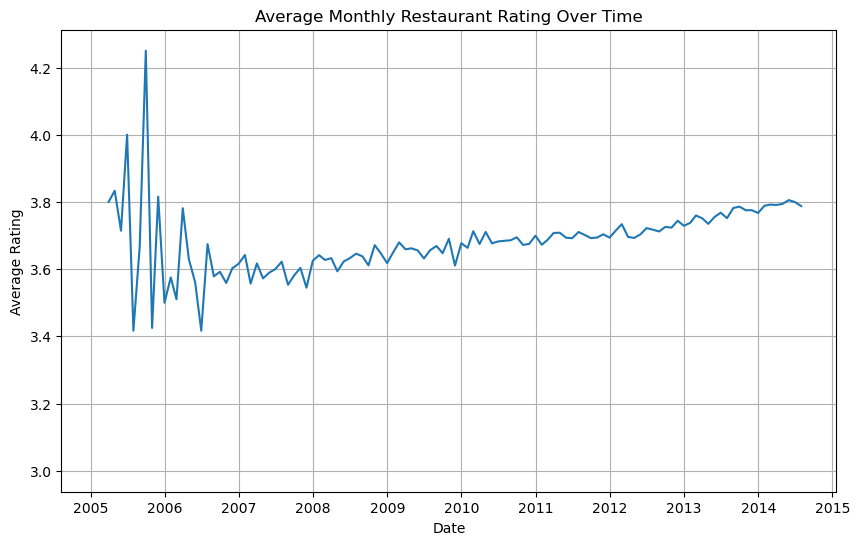

In [ ]:
df["Review_Date"] = pd.to_datetime(df["Review_Date"])

monthly_trend = (
    df.set_index("Review_Date")
      .resample("M")["Avg_Business_Star_Rating"]
      .mean()
)

plt.figure(figsize=(10,6))
plt.plot(monthly_trend)
plt.title("Average Monthly Restaurant Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [ ]:
# On Mondays People are more likely to make review so consider better service on Mondays

# Graphs shows that as time goes on the average rating for a restaurant also increases

In [16]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    return R * c

df = df.sort_values(["User_ID", "Review_Date"])

df["prev_lat"] = df.groupby("User_ID")["Latitude"].shift()
df["prev_lon"] = df.groupby("User_ID")["Longitude"].shift()

df["distance"] = df.apply(
    lambda row: haversine(
        row["prev_lat"], row["prev_lon"],
        row["Latitude"], row["Longitude"]
    ) if pd.notnull(row["prev_lat"]) else 0,
    axis=1
)

distance_by_user = (
    df.groupby("User_ID")["distance"]
      .sum()
      .sort_values(ascending=False)
)

distance_by_user.head(1)

User_ID
6uYJ-ixRxPMyf-iEbhoz2g    31766.797939
Name: distance, dtype: float64